In [1]:
#cleaner imports

#importing folders from my drive and unzipping
from google.colab import drive
drive.mount('/content/gdrive')
#!unzip /content/gdrive/MyDrive/fish_data.zip

#python libraries import
import pandas as pd
%pylab inline 
import seaborn as sns
sns.set()

#sklearn libraries
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans

#other libraries
from gensim.models.keyedvectors import KeyedVectors
from os import listdir
from os.path import isfile, join
import os
import skimage
from skimage import io
from IPython.display import SVG

# keras imports
import tensorflow as tf
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Lambda
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from keras.preprocessing.image import array_to_img
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

#flattening libraries
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from PIL import Image
import matplotlib.pylab as plt
from numpy import array
from sys import getsizeof
import warnings
import PIL

Mounted at /content/gdrive
Populating the interactive namespace from numpy and matplotlib


In [2]:
#using imagedatagenerator
datagen = ImageDataGenerator(rescale = 1/255)

datagen_test = ImageDataGenerator(rescale= 1/255)

In [3]:
#getting data 
train_generator = datagen.flow_from_directory(
    '/content/gdrive/MyDrive/fish_train_val',
    target_size = (200,200),
    batch_size = 10,
)

test_generator = datagen_test.flow_from_directory('/content/gdrive/MyDrive/fish_50_each',
                                                  target_size = (200,200), batch_size=10)

Found 9010 images belonging to 9 classes.
Found 430 images belonging to 9 classes.


In [4]:
#trying to get x_train, y_train from imagedatagenerator

# Store the data in X_train, y_train variables by iterating over the batches
train_generator.reset()
X_train, y_train = next(train_generator)
for i in range(int(len(train_generator))-1): #1st batch is already fetched before the for loop.
  img, label = next(train_generator)
  X_train = np.append(X_train, img, axis=0 )
  y_train = np.append(y_train, label, axis=0)
print(X_train.shape, y_train.shape)

#note it takes a very long time to get all 9k images approx 1hr 15m

(9010, 200, 200, 3) (9010, 9)


In [5]:
#trying to get x_test, y_test from imagedatagenerator

# Store the data in X_est, y_test variables by iterating over the batches
test_generator.reset()
X_test, y_test = next(test_generator)
for i in range(int(len(test_generator))-1): #1st batch is already fetched before the for loop.
  img, label = next(test_generator)
  X_test = np.append(X_test, img, axis=0 )
  y_test = np.append(y_test, label, axis=0)
print(X_test.shape, y_test.shape)

(430, 200, 200, 3) (430, 9)


In [6]:
#flattening X_train
X_train2 = []
y_train2 = []
for x in X_train:
  X_train2.append(x.flatten())

for y in y_train:
  y_train2.append(np.argmax(y))

In [7]:
#flattening X_test
X_test2 = []
y_test2 = []
for x in X_test:
  X_test2.append(x.flatten())

for y in y_test:
  y_test2.append(np.argmax(y))

In [8]:
#scaling x train/x test

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

SS_X_train2 = scaler.fit_transform(X_train2)
SS_X_test2 = scaler.transform(X_test2)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
PCA_X_train2 = pca.fit_transform(SS_X_train2)
PCA_X_test2 = pca.transform(SS_X_test2)

In [18]:
#seeing if it works with regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class= 'multinomial', solver= 'lbfgs')

#multi_class= 'multinomial', solver= 'lbfgs'

lr.fit(PCA_X_train2, y_train2)



LogisticRegression(multi_class='multinomial')

In [19]:
#baseline LR model scores .25348 accuracy 

y_pred = lr.predict(PCA_X_test2)

lr.score(PCA_X_test2, y_test2)


0.2534883720930233

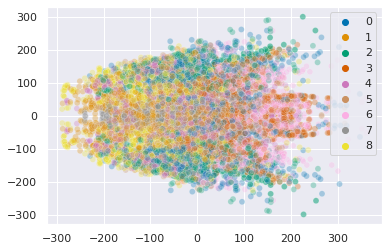

In [23]:
#checking a scatterplot of what the data looks like post transformations
sns.scatterplot(x=PCA_X_train2[:, 0], y=PCA_X_train2[:, 1],
                hue=y_train2, alpha=.3,
                palette=sns.color_palette("colorblind", 9))
plt.savefig('Non-DL seperation plot')

'\nnow it looks like this?\n y            x \n 1 1-9        120k pixels\n 2 1-9        120k pixels\n 3 1-9        120k pixels\n 4 1-9        120k pixels\n 5 1-9        120k pixels\n 6 1-9        120k pixels\n 7 1-9        120k pixels\n . . \n . . \n . .\n 900 1-9\n'

'\n y should hopefully look like:\n\n 1 1-9\n 2 1-9\n 3 1-9\n 4 1-9\n 5 1-9\n 6 1-9\n 7 1-9\n . . \n . . \n . .\n 900 1-9\n\n'